#### Import Libraries
#### Import Data
#### Exclude Cities not needed
#### Create training set

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [5]:
climatewins =pd.read_csv(r"C:\Users\agwsi\CF\Machine Learning\DATASET_scaled with date and time.csv")

In [6]:
climatewins.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_max,...,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,19600101,1,0.660514,-1.101066,0.826097,-0.265148,-0.001949,-0.179228,-0.902918,-0.478356,...,-0.443701,-0.806427,0.761754,-0.088407,-1.299744,-0.024706,0.372147,-0.752237,-0.668215,-0.519743
1,19600102,1,0.244897,-1.058108,0.735760,1.658760,-0.001949,-0.179228,-0.810126,-0.569988,...,0.783085,-1.042055,1.183580,0.503361,-1.262455,-0.024706,-0.829285,-0.407141,-0.548046,-0.629054
2,19600103,1,1.076130,-1.251420,1.277781,0.155707,-0.001949,-0.179228,-1.065304,-0.592896,...,0.783085,-1.136306,1.183580,-0.396127,-0.432779,-0.024706,-1.009500,-0.177078,-0.067372,0.054135
3,19600104,1,-1.001953,-0.821838,1.458455,-0.445514,-0.001949,-0.179228,-0.114186,-0.512718,...,0.783085,-1.183432,0.480538,0.669056,0.387574,-0.024706,-1.039536,-0.838511,-0.998679,-0.164486
4,19600105,1,0.244897,-0.746661,1.729466,-0.164944,-0.001949,-0.179228,0.187388,-1.039603,...,-1.670486,-0.794645,-0.363113,-0.490810,1.729970,-0.024706,0.672505,-1.471186,-1.509396,-1.339569


In [7]:
pleasantweather = pd.read_csv(r"C:\Users\agwsi\CF\Machine Learning\Weather_Prediction_Pleasant_Weather.csv")

In [8]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Cities to exclude
exclude_cities = ['GDANSK', 'ROMA', 'TOURS']

# Filter columns to keep only those that do not contain any excluded city
columns_to_keep = [col for col in climatewins.columns if not any(city in col for city in exclude_cities)]

# Create a new DataFrame with filtered columns
climatewins2 = climatewins[columns_to_keep]

In [10]:
climatewins2.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_global_radiation,BASEL_humidity,BASEL_precipitation,BASEL_pressure,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_max,...,VALENTIA_cloud_cover,VALENTIA_global_radiation,VALENTIA_humidity,VALENTIA_precipitation,VALENTIA_pressure,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min
0,19600101,1,0.660514,-1.101066,0.826097,-0.265148,-0.001949,-0.179228,-0.902918,-0.478356,...,-0.443701,-0.806427,0.761754,-0.088407,-1.299744,-0.024706,0.372147,-0.752237,-0.668215,-0.519743
1,19600102,1,0.244897,-1.058108,0.735760,1.658760,-0.001949,-0.179228,-0.810126,-0.569988,...,0.783085,-1.042055,1.183580,0.503361,-1.262455,-0.024706,-0.829285,-0.407141,-0.548046,-0.629054
2,19600103,1,1.076130,-1.251420,1.277781,0.155707,-0.001949,-0.179228,-1.065304,-0.592896,...,0.783085,-1.136306,1.183580,-0.396127,-0.432779,-0.024706,-1.009500,-0.177078,-0.067372,0.054135
3,19600104,1,-1.001953,-0.821838,1.458455,-0.445514,-0.001949,-0.179228,-0.114186,-0.512718,...,0.783085,-1.183432,0.480538,0.669056,0.387574,-0.024706,-1.039536,-0.838511,-0.998679,-0.164486
4,19600105,1,0.244897,-0.746661,1.729466,-0.164944,-0.001949,-0.179228,0.187388,-1.039603,...,-1.670486,-0.794645,-0.363113,-0.490810,1.729970,-0.024706,0.672505,-1.471186,-1.509396,-1.339569


In [11]:
#Create an 'X' matrix by dropping the columns not needed
X = climatewins2.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [12]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Artificial Neural Networks

In [14]:
from sklearn.preprocessing import StandardScaler
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749  1.18161475 -0.61660315 ...  1.16512065  1.45475014
   1.57581674]
 [ 1.08186228 -0.82723961  0.55778807 ... -0.00981651 -0.0139084
  -0.0077553 ]
 [ 0.66637232 -1.00986274  0.73846364 ... -2.18774879 -2.92125284
  -3.22950531]
 ...
 [ 1.08186228 -1.25694108  1.64184151 ... -0.61161358 -0.07385364
   0.48369809]
 [ 0.66637232  0.66597299  0.64812586 ...  0.64929458  0.55557144
   0.42909216]
 [-1.41107749 -0.01080682 -1.33930545 ... -0.00981651 -0.0139084
  -0.0077553 ]]


In [15]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

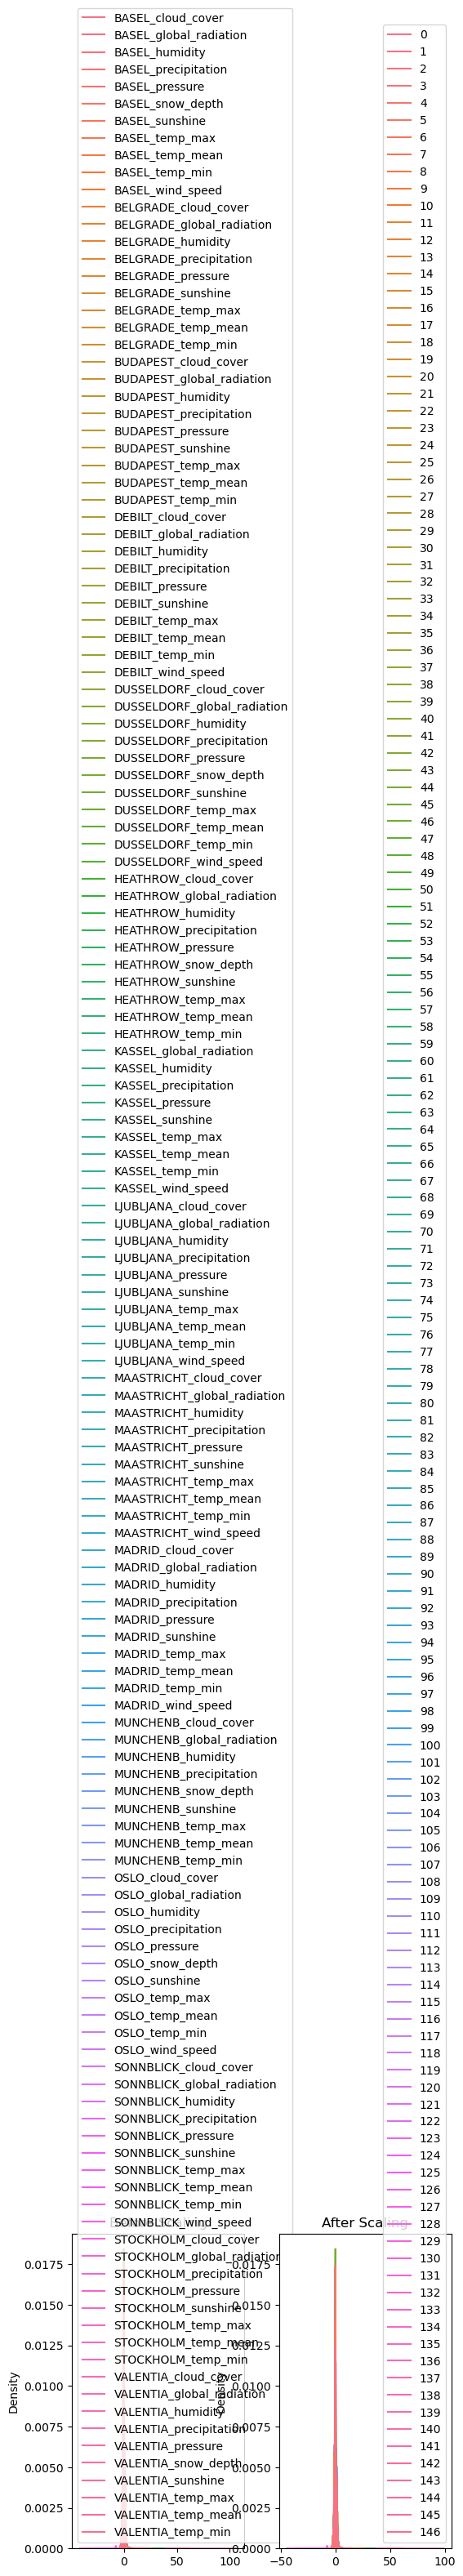

In [16]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. 
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\agwsi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [18]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.48663722983964675
0.49843150923666785


#### No convergence on answer and not very accurrate (49%)

In [20]:
# another attempt with 10,5 hidden layer size
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [21]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5184754822217058
0.521261763680725


In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [23]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6413548686962585
0.6101429069362148


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=1000)

In [25]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7202533116430397
0.6850819100731962


In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=2000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=2000)

In [27]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7245526376946316
0.6810735447891252


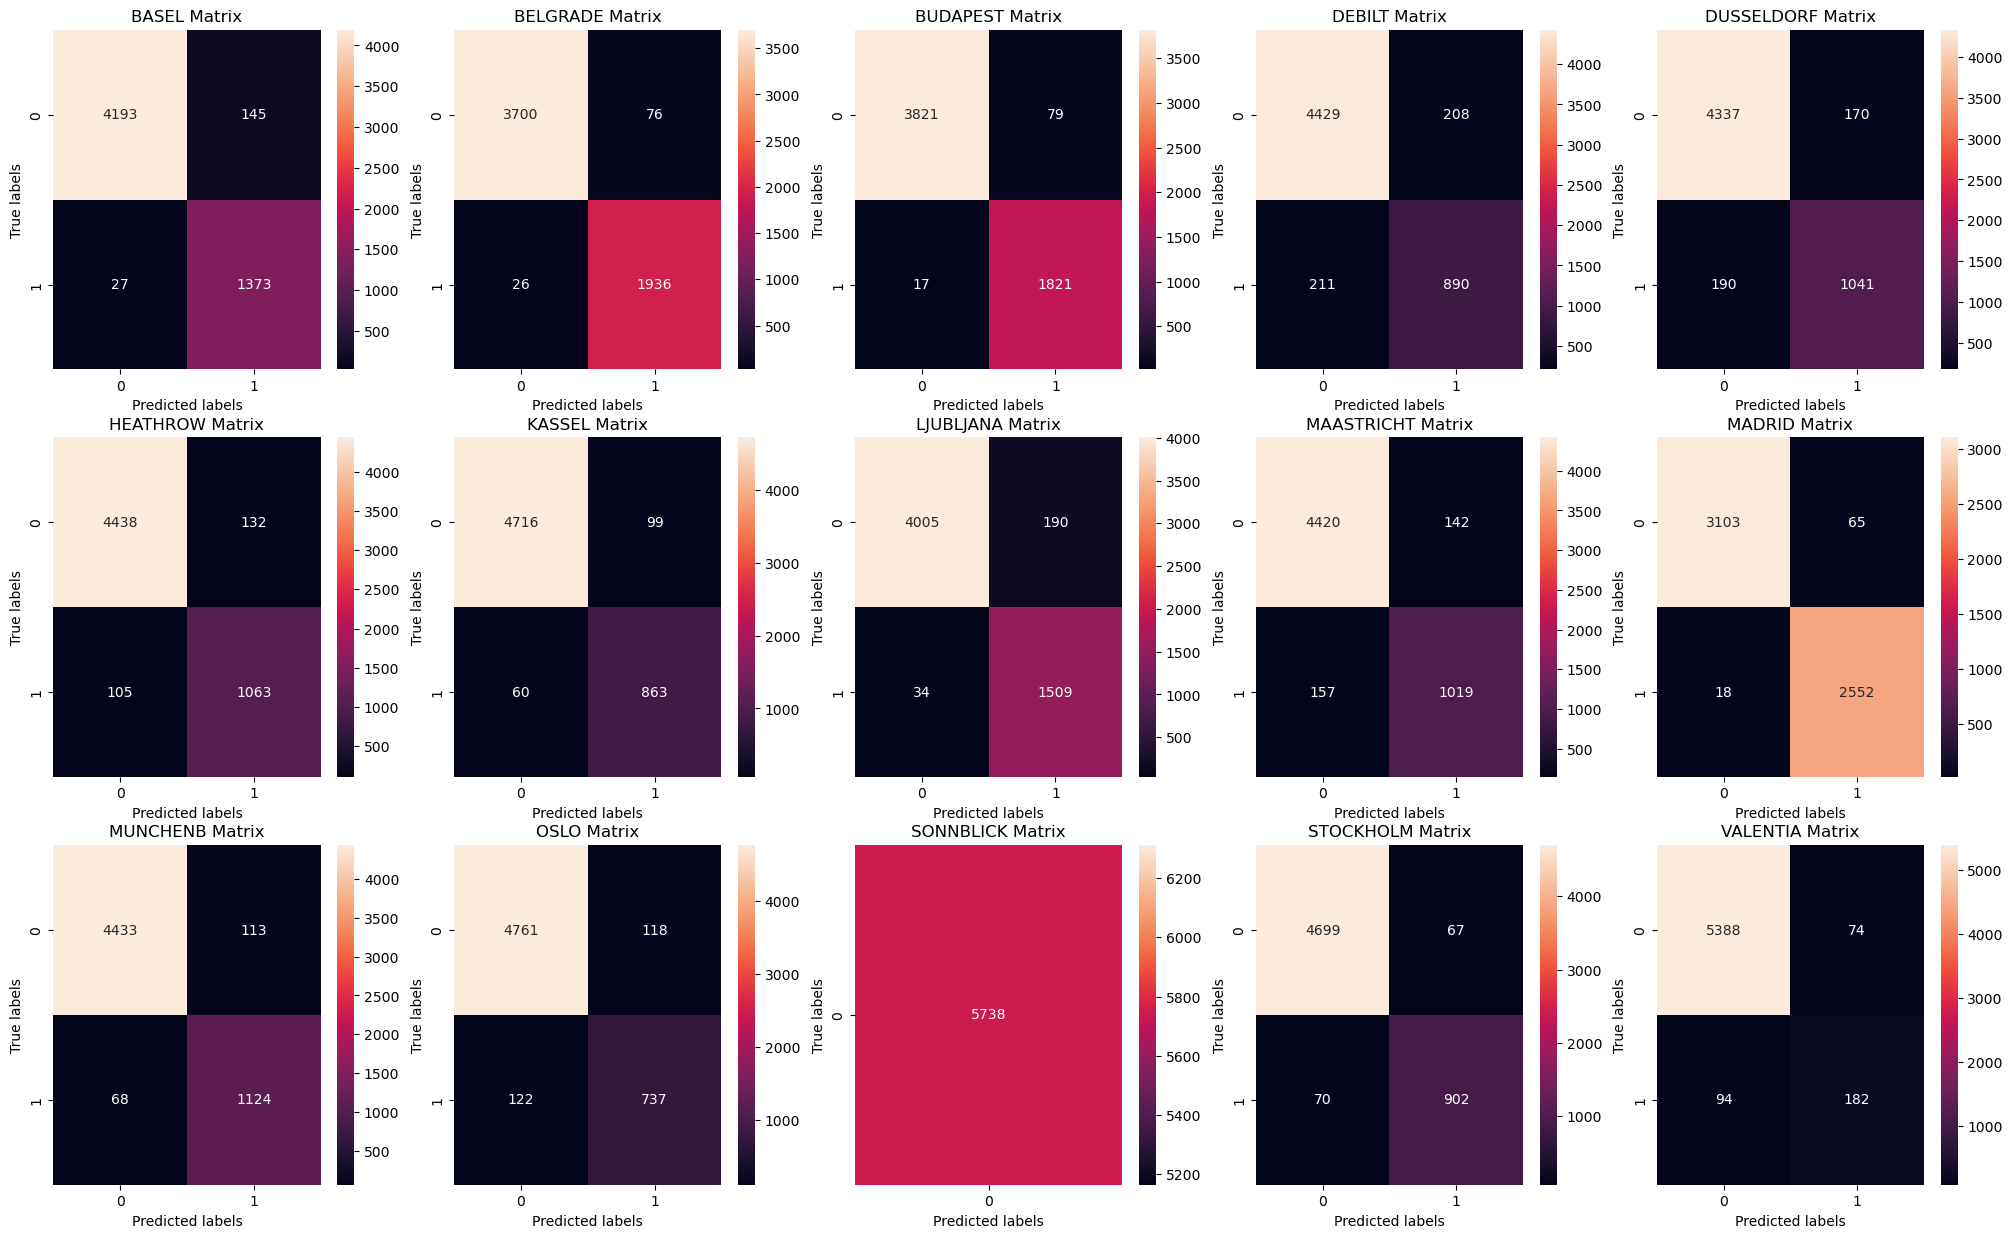

In [31]:
locations = list({x.split("_")[0] for x in climatewins2.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1


# Decision tree

[Text(0.36744474909057795, 0.9807692307692307, 'x[46] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06344394362032604, 0.9423076923076923, 'x[95] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.018083105335157317, 0.9038461538461539, 'x[17] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.0080220380964225, 0.8653846153846154, 'x[75] <= 0.233\ngini = 0.00

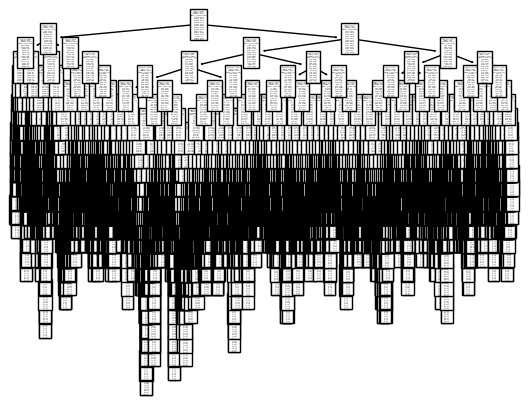

In [93]:
#Run Decision Tree classifier
weather_dt1 = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt1.fit(X_train, y_train)
figurefigsize=(15,15)
tree.plot_tree(weather_dt1)

In [95]:
weather_dt1 = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt1.fit(X_train, y_train)


DecisionTreeClassifier()

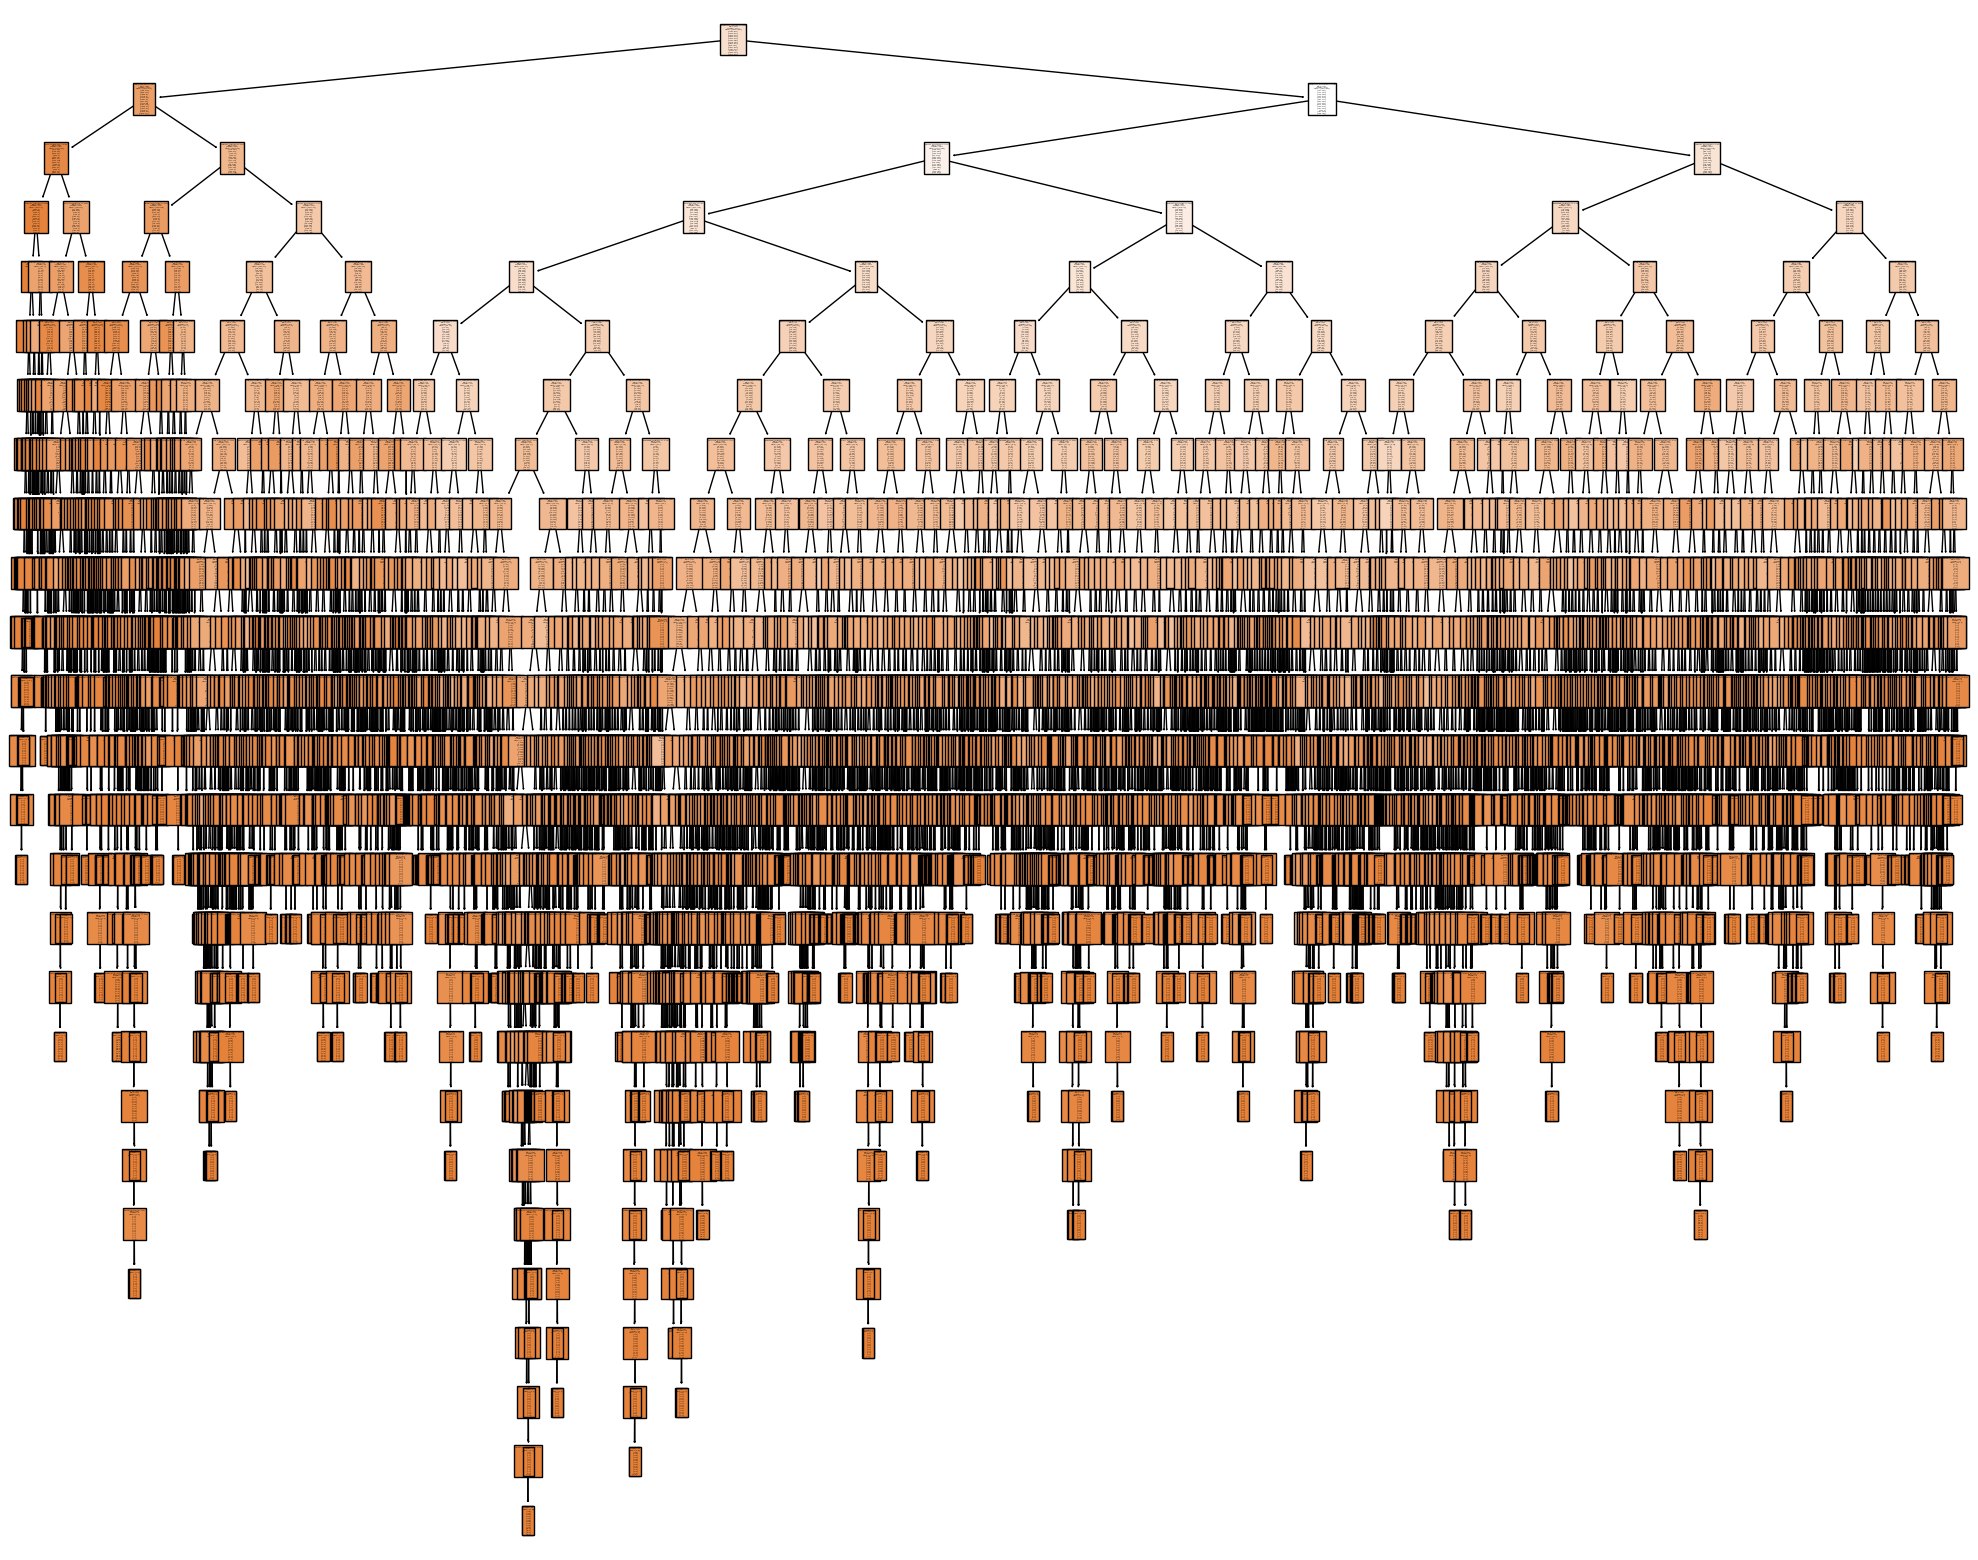

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
plot_tree(weather_dt1, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


In [101]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt1.predict(X_train)
print('Train accuracy score: ',cross_val_score(iris_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.602951234163128


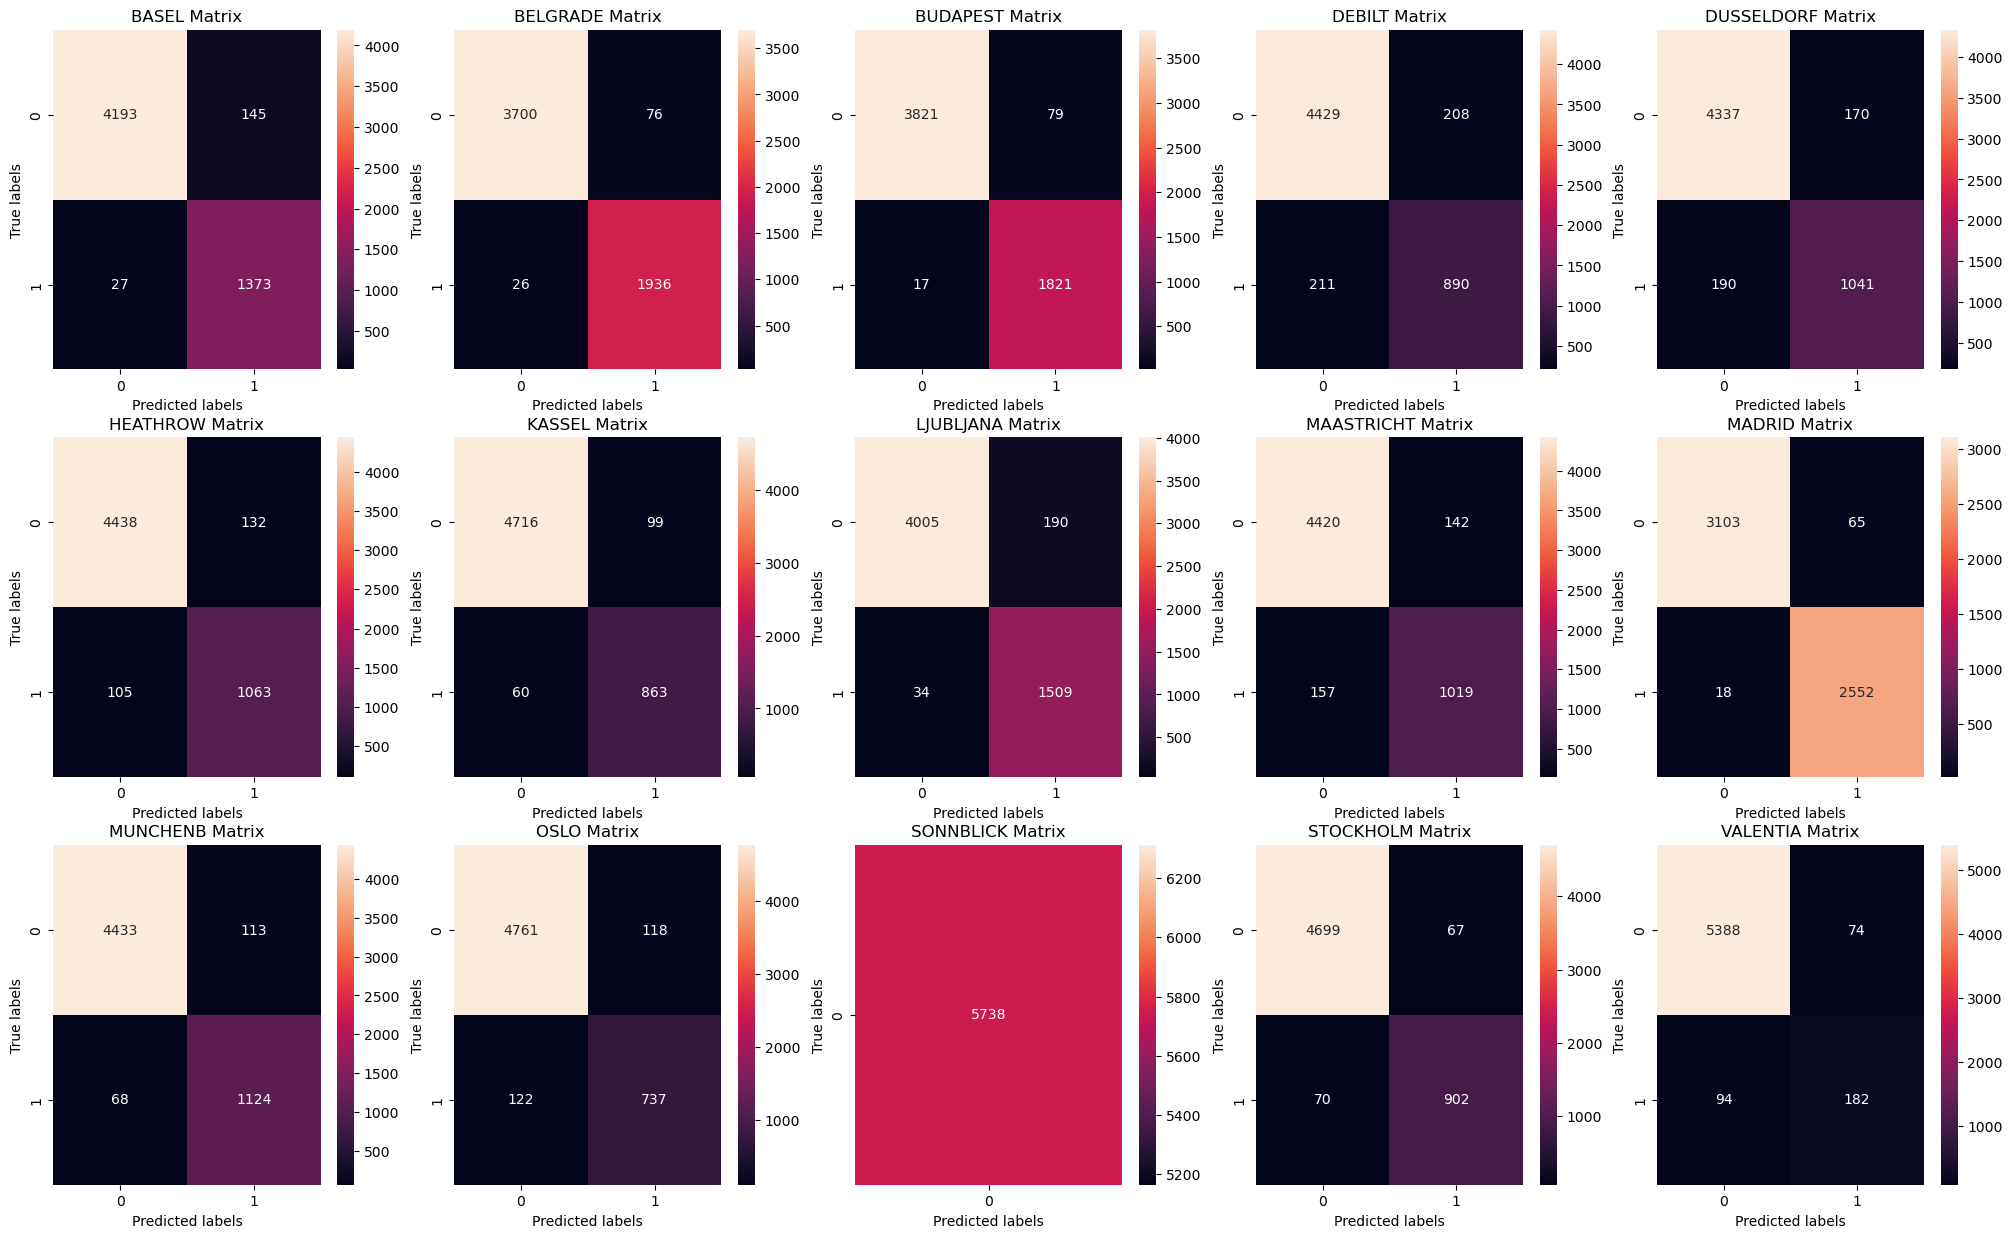

In [91]:
locations = list({x.split("_")[0] for x in pleasantweather.columns if x not in ["MONTH", "DATE"]})
locations.sort()

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1